### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from photonpairlab.spdc.spdc_simulation import SPDC_Simulation
from photonpairlab.crystal import Crystal
from photonpairlab.laser import Laser
from photonpairlab.materials import KTP1, KTP2, KTP3

## Example: How to run the simulation

In [2]:
# Initialize crystal parameters
Lc = 46.175e-6                # Coherence length (in meters)
Lo = 30e-3                    # Crystal length (in meters)
T = 38                    # Temperature (in degrees Celsius)
w = 18e-6                     # Domain width parameter (in meters)

material = KTP1()
crystal = Crystal(Lc, Lo, T, w, material, spdc="type-II")

# Initialize laser parameters
lambda_2w = 775e-9            # Central wavelength of the pump (in meters)
pulse_duration = 1.7e-12      # Pulse duration (in seconds)
laser = Laser(lambda_2w, pulse_duration)

# Generate the poling pattern in the crystal
crystal.generate_poling(laser=laser, mode='sub-coherence', resolution=5)

# Create and run the simulation
simulation = SPDC_Simulation(crystal, laser)

simulation.run_simulation(steps=100, dev=5)
print(f'The simulated purity is P={simulation.Purity}')
print(f'The simulated Schmidt number K={simulation.K}')

The simulated purity is P=0.9943228649620897
The simulated Schmidt number K=1.005709548918124


### Plot the results

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Pump Pulse Envelope (PPE)'}, xlabel='signal wavelength (nm)', ylabel='idler wavelength (nm)'>)

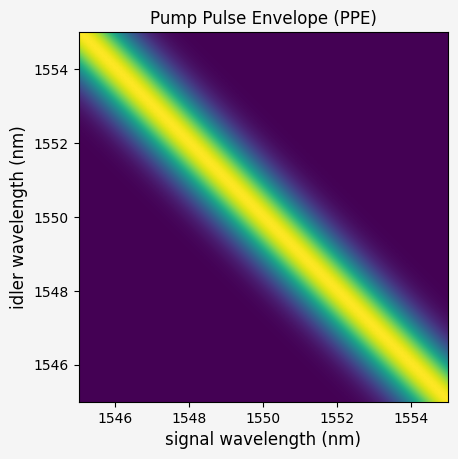

In [3]:
simulation.plot_pump()

(<Figure size 640x480 with 2 Axes>,
 (<Axes: title={'center': 'Schmidt Decomposition of the JSA - Resulting purity: 0.99'}, ylabel='Schmidt Coefficients'>,
  <Axes: title={'center': 'JSI Profiles'}, xlabel='wavelength (nm)', ylabel='normalized amplitude'>))

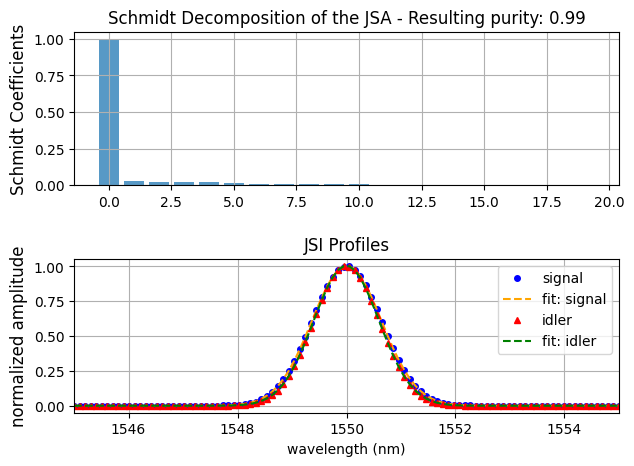

In [4]:
simulation.plot_schmidt_coefficients()

## Example: How to do multiple simulations to find the optimal temperature for degenerate down-conversion

In [ ]:
# Initialize crystal parameters
Lc = 46.175e-6                # Coherence length (in meters)
Lo = 30e-3                    # Crystal length (in meters)
w = 18e-6                     # Domain width parameter (in meters)

material = KTP1()

# Initialize laser parameters
lambda_2w = 775e-9            # Central wavelength of the pump (in meters)
pulse_duration = 1.7e-12      # Pulse duration (in seconds)
laser = Laser(lambda_2w, pulse_duration)

# Define a range of temperatures and create crystals for each temperature
temperatures = np.linspace(20, 25, 25)
crystals = [Crystal(Lc, Lo, temperature, w, material, spdc="type-II") for temperature in temperatures]

# Generate the poling pattern in the crystal
for crystal in crystals:
    crystal.generate_poling(laser=laser, mode='periodic', resolution=5)

# Create and run the simulation
simulations = [SPDC_Simulation(crystal, laser) for crystal in crystals]

for simulation in simulations:
    simulation.run_simulation(steps=100, dev=5)


### Fitting for signal and idler peak wavelengths and plotting the results

In [ ]:
signal_peaks = np.array([simulation.get_signal_idler_fits()[0][1] for simulation in simulations])
idler_peaks = np.array([simulation.get_signal_idler_fits()[1][1] for simulation in simulations])

fig, ax = plt.subplots()

ax.plot(temperatures, signal_peaks, marker='.', linestyle='None', color='blue',label='Signal Peak')
ax.plot(temperatures, idler_peaks, marker='.', linestyle='None',color='red',label='Idler Peak')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Peak Wavelength (nm)')
ax.set_title('Signal and Idler Peaks vs Temperature')
ax.legend()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.grid()